<br><h1> <img src="https://serea2017.uniandes.edu.co/images/Logo.png" height="120" width="400" align="Center" /><br>

## MIIA-4203 MODELOS AVANZADOS PARA ANÁLISIS DE DATOS II
# Micro-Proyecto 2

### Profesor: Camilo Franco (c.franco31@uniandes.edu.co)

A continuación escriba los nombres de los integrantes del grupo.

                         Names                 User                Code
           - Romero Fonseca Angela Fernanda       af.romerof     201819276       
           - Juan Fernando Ortiz Serrano          jf.ortiz43     200623117
           - Elquin Huertas Ramírez               e.huertas      201920061



### Introducción
Una aplicación de música quiere actualizar su aplicación online para que genere recomendaciones a sus usuarios de nuevos artistas para escuchar. El sistema de recomendación debe tomar en cuenta las preferencias de cada usuario, con el fin de ofrecer recomendaciones automáticas y personalizadas.

La base de datos que va a trabajar se ha tomado de http://ocelma.net/MusicRecommendationDataset/lastfm-360K.html


### Enunciado 1
Por ello se le pide a usted, en calidad de consultor externo, desarrollar un algoritmo de recomendación de artistas para cada usuario. Implemente el algoritmo a partir del conjunto de datos: "lastfm-dataset-360K/usersha1-profile.tsv" y evalúe su desempeño con respecto a la métrica apropiada.

### Enunciado 2
Una vez a desarrollado su primer sistema de recomendación, intente mejorarlo con respecto a la métrica de su elección, considerando además la información que encuentra en "lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv", donde encuentra información de tipo socio-demográfico por usuario.

Veamos los datos con los que vamos a trabajar:

In [1]:
import pandas as pd
import tarfile
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.listdir('/content/gdrive/My Drive/Colab Notebooks/Mode. Avanz. Análisis Datos 2')

['lastfm-dataset-360K.tar.gz']

Importamos y descomprimimos los datos:

In [4]:
tf = tarfile.open("/content/gdrive/My Drive/Colab Notebooks/Mode. Avanz. Análisis Datos 2/lastfm-dataset-360K.tar.gz")
tf.extractall()

Veamos los archivos que hemos importado:

In [5]:
tf.getmembers()

[<TarInfo 'lastfm-dataset-360K' at 0x7fd290f002a0>,
 <TarInfo 'lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv' at 0x7fd290f004f8>,
 <TarInfo 'lastfm-dataset-360K/README.txt' at 0x7fd290f00430>,
 <TarInfo 'lastfm-dataset-360K/mbox_sha1sum.py' at 0x7fd290f005c0>,
 <TarInfo 'lastfm-dataset-360K/usersha1-profile.tsv' at 0x7fd290f00688>]

Veamos el archivo con la informacion de los usuarios y sus artistas preferidos. Esta base de datos nos dice cuantas veces un usuario a escuchado a un artista.

In [6]:
# leemos el archivo con columnas user/artist/plays
data = pd.read_table("lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv", 
                         usecols=[0, 2, 3], 
                         names=['user', 'artist', 'plays'])

# map each artist and user to a unique numeric value
data['user'] = data['user'].astype("category")
data['artist'] = data['artist'].astype("category")


In [ ]:
data.head(10)
data.shape

(17535655, 3)

# **Análisis Exploratorio de datos**

### **Análisis de los datos por artista**
- **¿Cuántos artistas diferentes tiene la base de datos?**

In [ ]:
artistas = pd.pivot_table(data,index="artist",values="plays",aggfunc="sum")
len(artistas)

292363

- Hay 292.363 nombres de artistas diferentes

#### Ahora veámos la lista de los principales artistas ordenados según su cantidad de reproducciones

In [ ]:
pd.pivot_table(data,index="artist",values="plays",aggfunc="sum").sort_values(by = 'plays', ascending = False).head(50)

,plays
artist,
the beatles,30466827
radiohead,27426234
coldplay,16686772
pink floyd,15943557
metallica,15481852
muse,15451683
nine inch nails,14075619
red hot chili peppers,13547741
linkin park,12836638


#### A continuación se analizan algunas estadísticas descriptivas de la cantidad de reproducciones por artista

In [ ]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
pd.pivot_table(data,index="artist",values="plays",aggfunc="sum").describe(
    percentiles= [0.01,0.05,0.06,0.07,0.08,0.09,0.1,0.15,0.2, 0.25,0.3, 0.5,0.75,0.8,0.9,0.95,0.96,0.97,0.98,0.99,0.995,1])

,plays
count,292363
mean,12907
std,185982
min,1
1%,2
5%,7
6%,8
7%,10
8%,12
9%,13


- Se observa que la mediana de reproducciones está en 208, mientras que el promedio está en 12.907, lo cual indica que: 1. la distribución está altamente sesgada hacia la derecha  y 2. Hay artistas y reproducciones con baja participación, por ello se sugiere tomar los artistas cuyas reproducciones sean superiores o iguales a 50, con esto se considerará el 75% de la base de artistas y también aportará positivamente al rendimiento computacional.

### **Análisis de datos por usuario**

In [ ]:
usuarios = pd.pivot_table(data,index="user",values="plays",aggfunc="sum")


- Hay 358.868 usuarios diferentes, veamos su comportamiento respecto a las reproducciones de canciones que hacen

In [ ]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
pd.pivot_table(data,index="user",values="plays",aggfunc="sum").describe(
    percentiles= [0.0025, 0.005,0.01,0.05,0.06,0.07,0.08,0.09,0.1,0.15,0.2, 0.25,0.5,0.75,0.8,0.9,0.95,0.96,0.97,0.98,0.99,0.995,1])

,plays
count,358868
mean,10515
std,14761
min,1
0.2%,38
0.5%,63
1%,103
5%,403
6%,484
7%,566


- La mediana de reproducciones por usuario es 6.140, el promedio está en 10.509, esta distribución está sesgada hacia la derecha, sin embargo la asimetría es mucho menor que la observada en el caso de los artistas. También hay usuarios con baja participación en reproducciones, por ello se sugiere tomar los usuarios cuyas reproducciones sean superiores o iguales a 40, con esto se considerará el 99,75% de la base de usuarios.

In [8]:
min_a_plays = 50
filter_a = data['artist'].value_counts() > min_a_plays
filter_a = filter_a[filter_a].index.tolist()


min_u_plays = 40
filter_u = data['user'].value_counts() > min_u_plays
filter_u = filter_u[filter_u].index.tolist()

df_nuevo = data[(data['artist'].isin(filter_a)) & (data['user'].isin(filter_u))]
print('Los datos originales tienen tamaño:\t{}'.format(data.shape))
print('Los nuevo datos tienen tamaño:\t{}'.format(df_nuevo.shape))

Los datos originales tienen tamaño:	(17535655, 3)
Los nuevo datos tienen tamaño:	(15197561, 3)


### Analicemos ahora algunas estadísticas de las reproducciones totales que hacen los usuarios en toda la base

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_nuevo["plays"].describe(
    percentiles= [0.0025, 0.005,0.01,0.05,0.06,0.07,0.08,0.09,0.1,0.15,0.2, 0.25,0.5,0.75,0.8,0.9,0.95,0.96,0.97,0.98,0.99,0.995,1])

count   15197561.00
mean         225.22
std          620.02
min            1.00
0.2%           1.00
0.5%           1.00
1%             2.00
5%             7.00
6%             8.00
7%            10.00
8%            11.00
9%            12.00
10%           14.00
15%           21.00
20%           30.00
25%           39.00
50%          101.00
75%          236.00
80%          288.00
90%          492.00
95%          780.00
96%          896.00
97%         1065.00
98%         1337.00
99%         1938.00
99.5%       2756.00
100%      419157.00
max       419157.00
Name: plays, dtype: float64

- Al analizar la distribución de las reproducciones totales por usuario y artista se observa que estamos frente a una base muy dispersa en cuanto al número de reproducciones, con usuarios que en la parte izquierda de la distribución tienen pocas reproducciones en los artistas que escuchan (El 25% de la base tiene hasta 39 reproducciones, y en la parte derecha, algunos usuarios con artistas muy reproducidos.


- Con el fin de lograr optimizar el trabajo computacional, se selecciona una muestra diseñada bajo muestreo aleatorio simple con un nivel de confianza del 99% y con un 1% de margen de error. Con estos parámetros obtenemos un tamaño de muestra de 16.623, el cual para este ejercicio, redóndearemos en 20.000 casos.

In [9]:
# Subset
np.random.seed(0)
data2 = df_nuevo.loc[np.random.choice(df_nuevo.index,size=20000,replace=False)]
print (df_nuevo.shape)
print (data2.shape)

(15197561, 3)
(20000, 3)


In [11]:
data2 =data2.sort_values(["plays"], axis = 0, ascending = False, 
                  na_position ='last')

In [12]:
data2.head()

,user,artist,plays,rating
16292732,edfc2c631515a56bcbb039e6e97491c9053055c8,sabaton,35149,100
11487193,a8031d5e7f7bccee6dc80367029fe91fc980daca,assemblage 23,24077,100
10585925,9a985d5f2b606b058d96ab9a5223eeb376f237d5,britney spears,16593,100
3270426,2fc194c486db27ad6c528662d2caefa312b5016b,stam1na,15773,100
17329712,fcf9b47e6ef6aa3d7d5697edc3f9aff266868a94,billy joel,15089,100


- Con base en la variable de reproducciones (plays), se construye un  rating de cada usuario y artista, tomando para el rating la distribución en percentiles.
- Bajo esta definición se establecen niveles de recomendación (de 1 a 100) que permitan definir los artistas similares según las cantidades de reproducciones.

In [13]:
data2["rating"]= pd.qcut(data2['plays'], 100, labels=False).astype(int) + 1
data2.head()

,user,artist,plays,rating
16292732,edfc2c631515a56bcbb039e6e97491c9053055c8,sabaton,35149,100
11487193,a8031d5e7f7bccee6dc80367029fe91fc980daca,assemblage 23,24077,100
10585925,9a985d5f2b606b058d96ab9a5223eeb376f237d5,britney spears,16593,100
3270426,2fc194c486db27ad6c528662d2caefa312b5016b,stam1na,15773,100
17329712,fcf9b47e6ef6aa3d7d5697edc3f9aff266868a94,billy joel,15089,100


In [14]:
data3=data2.iloc[:,[0,1,3]]
data3.head()

,user,artist,rating
16292732,edfc2c631515a56bcbb039e6e97491c9053055c8,sabaton,100
11487193,a8031d5e7f7bccee6dc80367029fe91fc980daca,assemblage 23,100
10585925,9a985d5f2b606b058d96ab9a5223eeb376f237d5,britney spears,100
3270426,2fc194c486db27ad6c528662d2caefa312b5016b,stam1na,100
17329712,fcf9b47e6ef6aa3d7d5697edc3f9aff266868a94,billy joel,100


# **Creación de los sistemas de recomendación**

**Iniciamos con la implementación de ALS, posteriormente seguimos con implementación de metodologías con Surprise (SVD, SVDpp, KNN, etc), usando como medidas de desempeño el AUC, el RMSE y el FCP

1. Mínimos Cuadrados Alternantes (ALS)

In [ ]:
from pandas.api.types import CategoricalDtype

In [ ]:
import scipy.sparse as sparse
import numpy as np
from scipy.sparse.linalg import spsolve

import random
import datetime
from sklearn import metrics

Definimos la matriz sparse. Después de definida la matriz, encontramos que ás del 99% de la base tiene interacciones nulas entre usuario y artista

In [ ]:
usuarios = list(np.sort(data2.user.unique())) 
artistas = list(data2.artist.unique()) 
confianza = list(data2.plays) 

# Construimos la matriz

filas = data2.user.astype(CategoricalDtype(categories=usuarios)).cat.codes
cols = data2.artist.astype(CategoricalDtype(categories=artistas)).cat.codes 
prefs_sparse = sparse.csr_matrix((confianza, (filas, cols)), shape=(len(usuarios), len(artistas)))

In [ ]:
# Interacciones posibles
mat_dim = prefs_sparse.shape[0]*prefs_sparse.shape[1] 

# Numero de interacciones
num_ventas = len(prefs_sparse.nonzero()[0]) 
sparsity = 100*(1 - (num_ventas/mat_dim))
sparsity

99.98587235289394

Definimos el conjunto de entrenamiento y validación en los términos propuestos en clase

In [ ]:
def entrena(ratings, pct_val = 0.2):
    '''
    Input: Matriz de ratings
    Output: matriz de entrenamiento CE y de validacion CV, y user_inds
    
    Esta función toma la matriz orginal y enmascara un porcentaje de ratings pata la validacion
    El conjunto de validacion (CV) va a tener todos los ratings originales, mientras que el de entrenamiento (CE)
    reemplaza el porcentaje señalado con ceros
    
    pct_val: porcentaje de iteraciones a enmascarar
    user_inds: lista de usuarios aleatoriamente elegidos y enmascarados en CE.
    '''
    
    random.seed(0) # Semilla aeatoria
    
    CV = ratings.copy() 
    CV[CV != 0] = 1 # CV como una matriz binaria
    
    CE = ratings.copy() 
    non0_inds = CE.nonzero() # Indices donde hay interaccion
    non0_pares = list(zip(non0_inds[0], non0_inds[1])) # lista de indices usuario-item con interaccion
    
    num_muestra = int(np.ceil(pct_val*len(non0_pares))) 
    muestra = random.sample(non0_pares, num_muestra) # sub-muestreo sin reemplazo
    
    user_inds = [index[0] for index in muestra] # indices de usuario
    item_inds = [index[1] for index in muestra] # inidices de items
    
    CE[user_inds, item_inds] = 0 # Asigna 0 sobre las observaciones elegidas
    CE.eliminate_zeros() # Elimina los ceros en el arreglo sparce
    return CE, CV, list(set(user_inds)) 

In [ ]:
CE, CV, users_V = entrena(prefs_sparse, pct_val = 0.2)

In [ ]:
!pip install implicit

In [ ]:
import scipy
scipy.__version__

'1.4.1'

In [ ]:
import implicit

In [ ]:
def auc_score(preds, prueba):
    '''
    Esta funcion obtiene el AUC. 
    Input:
    parameters:
    preds: las predicciones del sistema
    prueba: las ventas verdaderas
    Output:
    AUC
    '''
    
    fpr, tpr, umbrales = metrics.roc_curve(prueba, preds)
    return metrics.auc(fpr, tpr)   

In [ ]:
def AUC_val(CE, users_V, preds, CV):
    '''
    Esta funcion calcula el AUC medio por usuario para todo usuario en el conjunto de validacion
    Input:
    CE: Conjunto de entrnamiento con un porcentaje de las interacciones originales enamscaradas
    preds: la matriz con las predicciones de los ratings para cada par usuario-item (lista
    con vectores de usuario y vectores de items)
    users_V: indices de los usuarios de validacion
    CV: conjunto de validacion 
    Output:
    AUC medio del CV para las interacciones usuario-item y para los items más populares
    '''
    
    # Inicializamos la lista para guardar el AUC de validacion 
    rec_auc = [] 
    # y el AUC para la recomendación por popularidad
    pop_auc = [] 
    
    # Tomamos la suma de interacciones por item para encontrar lo más popular
    pop_items = np.array(CV.sum(axis = 0)).reshape(-1) 
    item_vecs = preds[1]
    
    for user in users_V: 
        user_i = CE[user,:].toarray().reshape(-1) # usuario de validacion
        user_val = np.where(user_i == 0) # 
        
        # Toma la prediccion para el usuario-item
        user_vec = preds[0][user,:]
        pred = user_vec.dot(item_vecs).toarray()[0,user_val].reshape(-1)
        
        # Selecciona los ratings estimados para el usuario 
        actual = CV[user,:].toarray()[0,user_val].reshape(-1) 
        
        # Toma los pares con interacciones binarias de los datos originales
        pop = pop_items[user_val] # Popularidad del item
        rec_auc.append(auc_score(pred, actual)) # Calcula y guarda el AUC para el ususario
        pop_auc.append(auc_score(pop, actual)) # Calcula el AUC por popularidad

    
    return float('%.3f'%np.mean(rec_auc)), float('%.3f'%np.mean(pop_auc))  
   # Devuelve el AUC medio para validacion y por popularidad

In [ ]:
latent_factors = [10, 20, 30, 40, 80]
regularizations = [1., 5., 10., 100.]
regularizations.sort()
iter_array = [15, 25, 50, 100]


for fact in latent_factors:
    for reg in regularizations:
        for ite in iter_array:
            user_vecs, item_vecs = implicit.alternating_least_squares((CE*15).astype('double'),
                factors=fact,
                regularization=reg, 
                iterations=ite)
            print(AUC_val(CE, users_V, [sparse.csr_matrix(user_vecs), sparse.csr_matrix(item_vecs.T)], CV))
            print('Factors: {}'.format(fact))
            print('Regularization: {}'.format(reg))
            print('Iteration: {}'.format(ite))

(0.501, 0.769)
Factors: 10
Regularization: 1.0
Iteration: 15


(0.504, 0.769)
Factors: 10
Regularization: 1.0
Iteration: 25


(0.502, 0.769)
Factors: 10
Regularization: 1.0
Iteration: 50


(0.502, 0.769)
Factors: 10
Regularization: 1.0
Iteration: 100


(0.5, 0.769)
Factors: 10
Regularization: 5.0
Iteration: 15


(0.502, 0.769)
Factors: 10
Regularization: 5.0
Iteration: 25


(0.501, 0.769)
Factors: 10
Regularization: 5.0
Iteration: 50


(0.502, 0.769)
Factors: 10
Regularization: 5.0
Iteration: 100


(0.5, 0.769)
Factors: 10
Regularization: 10.0
Iteration: 15


(0.503, 0.769)
Factors: 10
Regularization: 10.0
Iteration: 25


(0.502, 0.769)
Factors: 10
Regularization: 10.0
Iteration: 50


(0.499, 0.769)
Factors: 10
Regularization: 10.0
Iteration: 100


(0.502, 0.769)
Factors: 10
Regularization: 100.0
Iteration: 15


(0.5, 0.769)
Factors: 10
Regularization: 100.0
Iteration: 25


(0.501, 0.769)
Factors: 10
Regularization: 100.0
Iteration: 50


(0.499, 0.769)
Factors: 10
Regularization: 100.0
Iteration: 100


(0.505, 0.769)
Factors: 20
Regularization: 1.0
Iteration: 15


(0.501, 0.769)
Factors: 20
Regularization: 1.0
Iteration: 25


(0.503, 0.769)
Factors: 20
Regularization: 1.0
Iteration: 50


(0.502, 0.769)
Factors: 20
Regularization: 1.0
Iteration: 100


(0.501, 0.769)
Factors: 20
Regularization: 5.0
Iteration: 15


(0.502, 0.769)
Factors: 20
Regularization: 5.0
Iteration: 25


(0.502, 0.769)
Factors: 20
Regularization: 5.0
Iteration: 50


(0.502, 0.769)
Factors: 20
Regularization: 5.0
Iteration: 100


(0.502, 0.769)
Factors: 20
Regularization: 10.0
Iteration: 15


(0.5, 0.769)
Factors: 20
Regularization: 10.0
Iteration: 25


(0.502, 0.769)
Factors: 20
Regularization: 10.0
Iteration: 50


(0.503, 0.769)
Factors: 20
Regularization: 10.0
Iteration: 100


(0.502, 0.769)
Factors: 20
Regularization: 100.0
Iteration: 15


(0.5, 0.769)
Factors: 20
Regularization: 100.0
Iteration: 25


(0.502, 0.769)
Factors: 20
Regularization: 100.0
Iteration: 50


(0.501, 0.769)
Factors: 20
Regularization: 100.0
Iteration: 100


(0.502, 0.769)
Factors: 30
Regularization: 1.0
Iteration: 15


(0.502, 0.769)
Factors: 30
Regularization: 1.0
Iteration: 25


(0.501, 0.769)
Factors: 30
Regularization: 1.0
Iteration: 50


(0.502, 0.769)
Factors: 30
Regularization: 1.0
Iteration: 100


(0.503, 0.769)
Factors: 30
Regularization: 5.0
Iteration: 15


(0.501, 0.769)
Factors: 30
Regularization: 5.0
Iteration: 25


(0.503, 0.769)
Factors: 30
Regularization: 5.0
Iteration: 50


(0.501, 0.769)
Factors: 30
Regularization: 5.0
Iteration: 100


(0.5, 0.769)
Factors: 30
Regularization: 10.0
Iteration: 15


(0.501, 0.769)
Factors: 30
Regularization: 10.0
Iteration: 25


(0.5, 0.769)
Factors: 30
Regularization: 10.0
Iteration: 50


(0.501, 0.769)
Factors: 30
Regularization: 10.0
Iteration: 100


(0.502, 0.769)
Factors: 30
Regularization: 100.0
Iteration: 15


(0.502, 0.769)
Factors: 30
Regularization: 100.0
Iteration: 25


(0.502, 0.769)
Factors: 30
Regularization: 100.0
Iteration: 50


(0.502, 0.769)
Factors: 30
Regularization: 100.0
Iteration: 100


(0.501, 0.769)
Factors: 40
Regularization: 1.0
Iteration: 15


(0.501, 0.769)
Factors: 40
Regularization: 1.0
Iteration: 25


(0.501, 0.769)
Factors: 40
Regularization: 1.0
Iteration: 50


(0.5, 0.769)
Factors: 40
Regularization: 1.0
Iteration: 100


(0.501, 0.769)
Factors: 40
Regularization: 5.0
Iteration: 15


(0.5, 0.769)
Factors: 40
Regularization: 5.0
Iteration: 25


(0.501, 0.769)
Factors: 40
Regularization: 5.0
Iteration: 50


(0.5, 0.769)
Factors: 40
Regularization: 5.0
Iteration: 100


(0.5, 0.769)
Factors: 40
Regularization: 10.0
Iteration: 15


(0.501, 0.769)
Factors: 40
Regularization: 10.0
Iteration: 25


(0.501, 0.769)
Factors: 40
Regularization: 10.0
Iteration: 50


(0.5, 0.769)
Factors: 40
Regularization: 10.0
Iteration: 100


(0.5, 0.769)
Factors: 40
Regularization: 100.0
Iteration: 15


(0.501, 0.769)
Factors: 40
Regularization: 100.0
Iteration: 25


(0.501, 0.769)
Factors: 40
Regularization: 100.0
Iteration: 50


(0.5, 0.769)
Factors: 40
Regularization: 100.0
Iteration: 100


(0.502, 0.769)
Factors: 80
Regularization: 1.0
Iteration: 15


(0.5, 0.769)
Factors: 80
Regularization: 1.0
Iteration: 25


(0.502, 0.769)
Factors: 80
Regularization: 1.0
Iteration: 50


(0.499, 0.769)
Factors: 80
Regularization: 1.0
Iteration: 100


(0.501, 0.769)
Factors: 80
Regularization: 5.0
Iteration: 15


(0.498, 0.769)
Factors: 80
Regularization: 5.0
Iteration: 25


(0.5, 0.769)
Factors: 80
Regularization: 5.0
Iteration: 50


(0.501, 0.769)
Factors: 80
Regularization: 5.0
Iteration: 100


(0.499, 0.769)
Factors: 80
Regularization: 10.0
Iteration: 15


(0.501, 0.769)
Factors: 80
Regularization: 10.0
Iteration: 25


(0.501, 0.769)
Factors: 80
Regularization: 10.0
Iteration: 50


(0.5, 0.769)
Factors: 80
Regularization: 10.0
Iteration: 100


(0.501, 0.769)
Factors: 80
Regularization: 100.0
Iteration: 15


(0.501, 0.769)
Factors: 80
Regularization: 100.0
Iteration: 25


(0.501, 0.769)
Factors: 80
Regularization: 100.0
Iteration: 50



(0.501, 0.769)
Factors: 80
Regularization: 100.0
Iteration: 100


### 2. Filtrado colaborativo: Uso de Surprise

In [113]:
!pip install surprise

     |████████████████████████████████| 11.8MB 4.7MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670941 sha256=7a69c1793dd3107cfd88cfd0149b7222962072844a6956a4a639d96406fd16d0
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [243]:
import surprise

from surprise import Reader
from surprise import SVD, SVDpp, SlopeOne, NMF, NormalPredictor, KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.model_selection import LeaveOneOut

In [240]:
reader = Reader(rating_scale=(1, 100))
data = Dataset.load_from_df(data3[['user', 'artist', 'rating']], reader)

data

In [241]:
import datetime

#### **Se comparan todas las metodologías que están implementadas en esta librería**

In [244]:
benchmark = []
# Implementamos validacion cruzada sobre todos los algoritmos
for algoritmo in [SVD(), SVDpp(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    
    print("\nAlgoritmo: ", algoritmo)
    tiempo = datetime.datetime.now()
    print('\nInicia la validacion cruzada: ', tiempo)
    
    results = cross_validate(algoritmo, data, measures=['RMSE','fcp'], cv=3, verbose=False)
    
    tiempo = datetime.datetime.now()
    print('\nTermina: ', tiempo)
    
    # Guardamos los resultados
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algoritmo).split(' ')[0].split('.')[-1]], index=['Algoritmo']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algoritmo').sort_values('test_rmse')  


Algoritmo:  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7fd28073d358>

Inicia la validacion cruzada:  2020-12-14 01:44:45.559515

Termina:  2020-12-14 01:44:49.154112

Algoritmo:  <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7fd28073d5c0>

Inicia la validacion cruzada:  2020-12-14 01:44:49.156991

Termina:  2020-12-14 01:44:54.303738

Algoritmo:  <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7fd28073d978>

Inicia la validacion cruzada:  2020-12-14 01:44:54.307018

Termina:  2020-12-14 01:45:02.478028

Algoritmo:  <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7fd28073d588>

Inicia la validacion cruzada:  2020-12-14 01:45:02.481033

Termina:  2020-12-14 01:45:03.391064

Algoritmo:  <surprise.prediction_algorithms.knns.KNNBaseline object at 0x7fd28073d278>

Inicia la validacion cruzada:  2020-12-14 01:45:03.393605
Estimating biases using als...
Computing the msd similarity matrix...
Done c

,test_rmse,test_fcp,fit_time,test_time
Algoritmo,,,,
KNNBaseline,28.743874,0.502415,8.248324,0.057599
KNNWithMeans,28.747146,0.166667,7.334269,0.061026
KNNWithZScore,28.764111,0.000000,8.529350,0.055451
BaselineOnly,28.779935,0.497717,0.111228,0.139843
SVD,28.782386,0.502924,1.014356,0.045167
SVDpp,28.848219,0.500000,1.531190,0.050397
CoClustering,28.882010,0.333333,1.958011,0.039602
KNNBasic,28.972256,0.000000,7.977560,0.057156
NMF,29.975936,0.333333,2.542997,0.047101


- De acuerdo con estos resultados, los métodos basados en vecinos más cercanos con ajustes (promedio, z-score) en la construcción de la variable de Rating,  nos ofrecen los menores RMSE, sin embargo no presentan los mejores resultados en la métrica que evalúa la concordancia del ejercicio predictivo. Los que tienen RMSE bajo y mejor FCP son los métodos BaselineOnly y KNNBaseline .

In [245]:
bsl_options = {'method': 'als',
               'n_epochs': 20,
               'reg_u': 12, 
               'reg_i': 5  
               }

sim_options = {'name': 'cosine',
               'user_based': False  # calcula similitudes entre items
               }

In [246]:
trainset, testset = train_test_split(data, test_size=0.3)

SVD = SVDpp(random_state=0)
KNN = KNNBaseline(bsl_options=bsl_options, sim_options=sim_options)
Base = BaselineOnly(bsl_options=bsl_options)

print("\nSVDpp: ")
tiempo = datetime.datetime.now()
print('\nInicia el entrenamiento y prueba: ', tiempo)

predSVD = SVD.fit(trainset).test(testset)
print("RMSE del SVDpp: ", accuracy.rmse(predSVD))
print("FCP del SVDpp: ", accuracy.fcp(predSVD))

tiempo = datetime.datetime.now()
print('\nTermina: ', tiempo)

print("\nKNNBaseline: ")
tiempo = datetime.datetime.now()
print('\nInicia el entrenamiento y prueba: ', tiempo)

predKNN = KNN.fit(trainset).test(testset)
print("\nRMSE del KNNBaseline: ", accuracy.rmse(predKNN))
print("\nFCP del KNNBaseline: ", accuracy.fcp(predKNN))

tiempo = datetime.datetime.now()
print('\nTermina: ', tiempo)

print("\nBaselineOnly: ")
tiempo = datetime.datetime.now()
print('\nInicia el entrenamiento y prueba: ', tiempo)

predBase = Base.fit(trainset).test(testset)
print("\nRMSE del BaselineOnly: ", accuracy.rmse(predBase))
print("\nFCP del BaselineOnly: ", accuracy.fcp(predBase))
tiempo = datetime.datetime.now()
print('\nTermina: ', tiempo)



SVDpp: 

Inicia el entrenamiento y prueba:  2020-12-14 01:48:42.829077
RMSE: 28.9115
RMSE del SVDpp:  28.911467470455673
FCP:  0.5000
FCP del SVDpp:  0.5

Termina:  2020-12-14 01:48:44.556740

KNNBaseline: 

Inicia el entrenamiento y prueba:  2020-12-14 01:48:44.556930
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 28.9290

RMSE del KNNBaseline:  28.929025728318997
FCP:  0.5000

FCP del KNNBaseline:  0.5

Termina:  2020-12-14 01:48:46.162212

BaselineOnly: 

Inicia el entrenamiento y prueba:  2020-12-14 01:48:46.162614
Estimating biases using als...
RMSE: 28.9290

RMSE del BaselineOnly:  28.929025728318997
FCP:  0.5000

FCP del BaselineOnly:  0.5

Termina:  2020-12-14 01:48:46.438328


- Bajo la implementación de muestra de entrenamiento y prueba, los resultados obtenidos son similares al ejercicio anterior que utilizaba validación cruzada

# **Analicemos el comportamiento de las variables demográficas de los usuarios**

También podemos ver informacion social/demográfica sobre los usuarios:

In [15]:
# leemos el archivo con columnas user/gender/age/country
dataP = pd.read_table("lastfm-dataset-360K/usersha1-profile.tsv", 
                         usecols=[0, 1, 2, 3], 
                         names=['user', 'gender', 'age', 'country'])


In [16]:
dataP.head(10)

,user,gender,age,country
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany
1,00001411dc427966b17297bf4d69e7e193135d89,f,NaN,Canada
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,NaN,NaN,Germany
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States
5,0000c176103e538d5c9828e695fed4f7ae42dd01,m,20.0,United Kingdom
6,0000ee7dd906373efa37f4e1185bfe1e3f8695ae,m,17.0,Finland
7,0000ef373bbd0d89ce796abae961f2705e8c1faf,f,22.0,Poland
8,0000f687d4fe9c1ed49620fbc5ed5b0d7798ea20,f,24.0,Spain
9,0001399387da41d557219578fb08b12afa25ab67,m,NaN,Ukraine


In [17]:
dataP.describe(include='all')

,user,gender,age,country
count,359347,326572,284447.000000,359347
unique,359347,2,NaN,239
top,7dd21e967c4bfb866753864e30ecd31a3d3c46e7,m,NaN,United States
freq,1,241642,NaN,67044
mean,NaN,NaN,25.098046,NaN
std,NaN,NaN,21.665742,NaN
min,NaN,NaN,-1337.000000,NaN
25%,NaN,NaN,20.000000,NaN
50%,NaN,NaN,23.000000,NaN
75%,NaN,NaN,28.000000,NaN


In [18]:
dataP.isnull().sum()

user           0
gender     32775
age        74900
country        0
dtype: int64

- El 1.6% de los registros de la variable género están nulos.
- El 3.74% de los registros de la variable edad están vacíos.

### Además de los datos faltantes, analicemos los datos extremos y atípicos de esta variable.

In [ ]:
dataP.age.describe(percentiles= [0.002, 0.0025, 0.003, 0.0035, 0.004, 0.005,0.01, 0.25,0.5,0.75,0.8,0.9,0.95,0.96,0.97,0.98,0.99,0.995,0.9955,1])

count    284447.00
mean         25.10
std          21.67
min       -1337.00
0.2%          2.00
0.25%         3.00
0.3%          4.00
0.35%         6.00
0.4%          9.00
0.5%         13.00
1%           15.00
25%          20.00
50%          23.00
75%          28.00
80%          30.00
90%          35.00
95%          41.00
96%          43.00
97%          46.00
98%          50.00
99%          59.00
99.5%        90.00
99.55%       98.00
100%       1002.00
max        1002.00
Name: age, dtype: float64

Text(0.5, 1.0, 'Distribución edad')

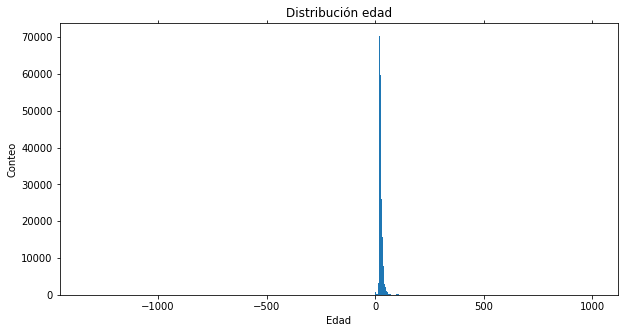

In [19]:
fig = plt.figure(figsize=(10,5))
bins = np.arange(dataP.age.min(),dataP.age.max(),3)
dataP.age.plot(kind='hist',bins=bins)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off')         # ticks along the top edge are off) # labels along the bottom edge are off
plt.ylabel("Conteo")
plt.xlabel("Edad")
plt.title("Distribución edad")

- La variable Edad tiene casos extremos que se podrían suponer como  errores de digitación/captura; considerando que son de baja participación, de procederá a realizar un proceso de imputación mediante la mediana, tanto para los datos faltantes, como para los datos extremos y atípicos.

In [20]:
dataP['age']= np.where(dataP['age'].between(dataP.age.min(),6),np.nan , dataP['age'])
dataP['age']= np.where(dataP['age'].between(61,200000),np.nan , dataP['age'])
dataP['age'] = dataP['age'].fillna(dataP.groupby('country')['age'].transform('median'))
dataP['age'] = dataP['age'].fillna(dataP.groupby('gender')['age'].transform('median'))
f = lambda x: x.median() if np.issubdtype(x.dtype, np.number) else x.mode().iloc[0]
dataP['age'] = dataP['age'].fillna(dataP.groupby('country')['age'].transform(f))


In [ ]:
dataP.age.describe(percentiles= [0.002, 0.0025, 0.003, 0.0035, 0.004, 0.005,0.01, 0.25,0.5,0.75,0.8,0.9,0.95,0.96,0.97,0.98,0.99,0.995,0.9955,1])

count    359347.00
mean         24.50
std           6.43
min           7.00
0.2%         14.00
0.25%        14.00
0.3%         14.00
0.35%        14.00
0.4%         15.00
0.5%         15.00
1%           16.00
25%          21.00
50%          23.00
75%          26.00
80%          28.00
90%          33.00
95%          38.00
96%          39.00
97%          41.00
98%          44.00
99%          49.00
99.5%        53.00
99.55%       54.00
100%         60.00
max          60.00
Name: age, dtype: float64

Text(0.5, 1.0, 'Distribución edad')

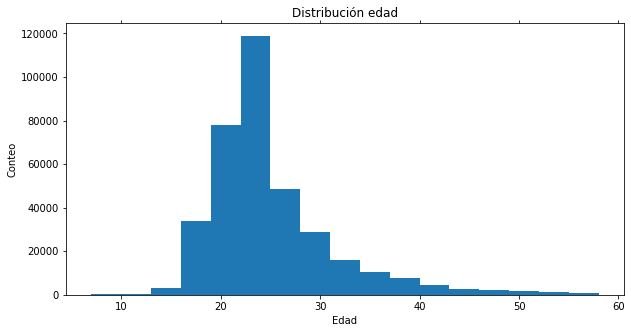

In [21]:
fig = plt.figure(figsize=(10,5))
bins = np.arange(dataP.age.min(),dataP.age.max(),3)
dataP.age.plot(kind='hist',bins=bins)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off')         # ticks along the top edge are off) # labels along the bottom edge are off
plt.ylabel("Conteo")
plt.xlabel("Edad")
plt.title("Distribución edad")

- Con la depuración de los datos, la distribución de la variable "edad", evidencia un promedio alrededor de los 24.5 años y una mediana de 23 años de edad de los usuarios.

### Analizamos la distribución de la variable Género

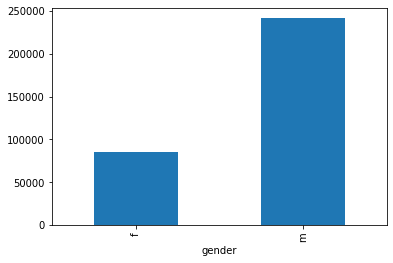

In [ ]:
dataP.groupby(['gender']).count()['age'].plot(kind = 'bar')

In [22]:
dataP.isnull().sum()

user           0
gender     32775
age            0
country        0
dtype: int64

- Para el caso del género, los datos faltantes se imputaron con la moda del género de cada país.

In [23]:
f = lambda x: x.median() if np.issubdtype(x.dtype, np.number) else x.mode().iloc[0]
dataP['gender'] = dataP['gender'].fillna(dataP.groupby('country')['gender'].transform(f))

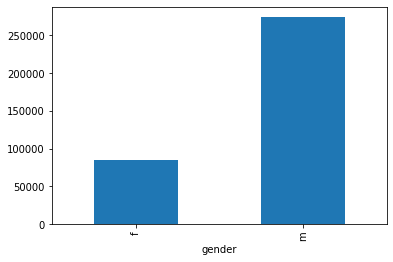

In [24]:
dataP.groupby(['gender']).count()['age'].plot(kind = 'bar')

In [25]:
dataP.isnull().sum()

user       0
gender     0
age        0
country    0
dtype: int64

### Analizamos la distribución de la variable País

Text(0.5, 1.0, 'Top 50 Países')

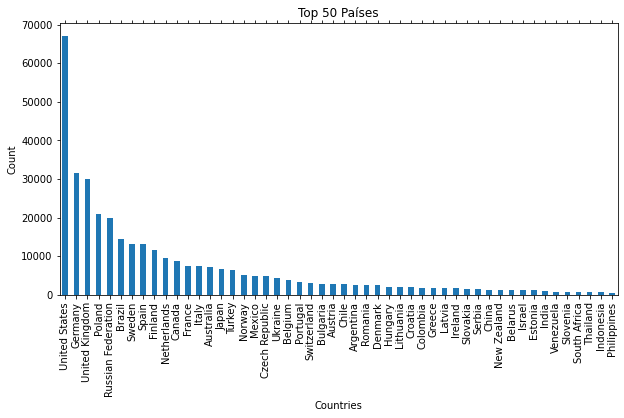

In [248]:
fig = plt.figure(figsize=(10,5))
dataP.country.value_counts().sort_values(inplace=False,ascending=False).head(50).plot(kind='bar')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off')         # ticks along the top edge are off) # labels along the bottom edge are off
plt.ylabel("Count")
plt.xlabel("Countries")
plt.title("Top 50 Países")

- Esta variable no tiene datos faltantes; por tanto, no requiere de proceso de limpieza ni de imputación.

In [ ]:
dataP.head()

,user,gender,age,country
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.00,Germany
1,00001411dc427966b17297bf4d69e7e193135d89,f,23.00,Canada
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,m,23.00,Germany
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.00,Mexico
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.00,United States


## Ahora se une la información demográfica de los usuarios a la muestra de datos con la que se están aplicando los sistemas de recomendación

In [213]:
data4 = pd.merge(data2, dataP, on="user")
print(data4.shape)


(20000, 7)


In [214]:
data4.head()

,user,artist,plays,rating,gender,age,country
0,edfc2c631515a56bcbb039e6e97491c9053055c8,sabaton,35149,100,m,18.0,Sweden
1,a8031d5e7f7bccee6dc80367029fe91fc980daca,assemblage 23,24077,100,f,21.0,Canada
2,9a985d5f2b606b058d96ab9a5223eeb376f237d5,britney spears,16593,100,m,17.0,Brazil
3,2fc194c486db27ad6c528662d2caefa312b5016b,stam1na,15773,100,f,18.0,Finland
4,fcf9b47e6ef6aa3d7d5697edc3f9aff266868a94,billy joel,15089,100,m,23.0,United States


### Se procede a codificar las variables categóricas

In [215]:
def cond(data4):
   if (data4['gender'] == "m"):
         return "0"
   elif (data4['gender'] =="f"):
         return "1"
   return np.nan

In [216]:
data4['gender2'] = data4.apply(cond, axis = 1)
data4["gender2"] = pd.to_numeric(data4["gender2"],downcast='integer',errors='ignore')

In [217]:
data4['country'] = data4['country'].replace("Cote D'Ivoire",'Cote DIvoire')
data4['country'] = data4['country'].replace("Korea, Democratic People's Republic of",'Korea, Democratic Peoples Republic of')
data4['country'] = data4['country'].replace("Lao People's Democratic Republic",'Lao Peoples Democratic Republic')

In [218]:
pd.crosstab(data4.country,data4.gender,margins=True)

gender,f,m,All
country,,,
Afghanistan,1,4,5
Albania,0,3,3
Algeria,1,0,1
American Samoa,0,3,3
Andorra,0,8,8
...,...,...,...
Wallis and Futuna,0,3,3
Western Sahara,0,2,2
Zambia,0,3,3


In [219]:
 def cond(data4):	
   if (data4['country'] == 'Afghanistan'):
     return '1' 
   if (data4['country'] == 'Albania'):
     return '2' 
   if (data4['country'] == 'Algeria'):
    return '3' 
   if (data4['country'] == 'American Samoa'):
    return '4' 
   if (data4['country'] == 'Andorra'):
    return '5' 
   if (data4['country'] == 'Angola'):
     return '6' 
   if (data4['country'] == 'Anguilla'):
     return '7' 
   if (data4['country'] == 'Antarctica'):
     return '8'
   if(data4['country'] == 'Antigua and Barbuda'):
     return '9' 
   if(data4['country'] == 'Argentina'):
        return '10' 
   if(data4['country'] == 'Armenia'):
        return '11' 
   if(data4['country'] == 'Aruba'):
        return '12' 
   if(data4['country'] == 'Australia'):
        return '13' 
   if(data4['country'] == 'Austria'):
        return '14' 
   if(data4['country'] == 'Azerbaijan'):
        return '15' 
   if(data4['country'] == 'Bahamas'):
        return '16' 
   if(data4['country'] == 'Bahrain'):
        return '17' 
   if(data4['country'] == 'Bangladesh'):
        return '18' 
   if(data4['country'] == 'Barbados'):
        return '19' 
   if(data4['country'] == 'Belarus'):
        return '20' 
   if(data4['country'] == 'Belgium'):
        return '21' 
   if(data4['country'] == 'Belize'):
        return '22' 
   if(data4['country'] == 'Benin'):
        return '23' 
   if(data4['country'] == 'Bermuda'):
        return '24' 
   if(data4['country'] == 'Bhutan'):
        return '25' 
   if(data4['country'] == 'Bolivia'):
        return '26' 
   if(data4['country'] == 'Bosnia and Herzegovina'):
        return '27' 
   if(data4['country'] == 'Botswana'):
        return '28' 
   if(data4['country'] == 'Bouvet Island'):
        return '29' 
   if(data4['country'] == 'Brazil'):
        return '30' 
   if(data4['country'] == 'British Indian Ocean Territory'):
        return '31' 
   if(data4['country'] == 'Brunei Darussalam'):
        return '32' 
   if(data4['country'] == 'Bulgaria'):
        return '33' 
   if(data4['country'] == 'Burkina Faso'):
        return '34' 
   if(data4['country'] == 'Burundi'):
        return '35' 
   if(data4['country'] == 'Cambodia'):
        return '36' 
   if(data4['country'] == 'Cameroon'):
        return '37' 
   if(data4['country'] == 'Canada'):
        return '38' 
   if(data4['country'] == 'Cape Verde'):
        return '39' 
   if(data4['country'] == 'Cayman Islands'):
        return '40' 
   if(data4['country'] == 'Central African Republic'):
        return '41' 
   if(data4['country'] == 'Chad'):
        return '42' 
   if(data4['country'] == 'Chile'):
        return '43' 
   if(data4['country'] == 'China'):
        return '44' 
   if(data4['country'] == 'Christmas Island'):
        return '45' 
   if(data4['country'] == 'Cocos (Keeling) Islands'):
        return '46' 
   if(data4['country'] == 'Colombia'):
        return '47' 
   if(data4['country'] == 'Comoros'):
        return '48' 
   if(data4['country'] == 'Congo'):
        return '49' 
   if(data4['country'] == 'Congo, the Democratic Republic of the'):
        return '50' 
   if(data4['country'] == 'Cook Islands'):
        return '51' 
   if(data4['country'] == 'Costa Rica'):
        return '52' 
   if(data4['country'] == 'Cote DIvoire'):
        return '53' 
   if(data4['country'] == 'Croatia'):
        return '54' 
   if(data4['country'] == 'Cuba'):
        return '55' 
   if(data4['country'] == 'Cyprus'):
        return '56' 
   if(data4['country'] == 'Czech Republic'):
        return '57' 
   if(data4['country'] == 'Denmark'):
        return '58' 
   if(data4['country'] == 'Djibouti'):
        return '59' 
   if(data4['country'] == 'Dominica'):
        return '60' 
   if(data4['country'] == 'Dominican Republic'):
        return '61' 
   if(data4['country'] == 'Ecuador'):
        return '62' 
   if(data4['country'] == 'Egypt'):
        return '63' 
   if(data4['country'] == 'El Salvador'):
        return '64' 
   if(data4['country'] == 'Equatorial Guinea'):
        return '65' 
   if(data4['country'] == 'Eritrea'):
        return '66' 
   if(data4['country'] == 'Estonia'):
        return '67' 
   if(data4['country'] == 'Ethiopia'):
        return '68' 
   if(data4['country'] == 'Falkland Islands (Malvinas)'):
        return '69' 
   if(data4['country'] == 'Faroe Islands'):
        return '70' 
   if(data4['country'] == 'Fiji'):
        return '71' 
   if(data4['country'] == 'Finland'):
        return '72' 
   if(data4['country'] == 'France'):
        return '73' 
   if(data4['country'] == 'French Guiana'):
        return '74' 
   if(data4['country'] == 'French Polynesia'):
        return '75' 
   if(data4['country'] == 'French Southern Territories'):
        return '76' 
   if(data4['country'] == 'Gabon'):
        return '77' 
   if(data4['country'] == 'Gambia'):
        return '78' 
   if(data4['country'] == 'Georgia'):
        return '79' 
   if(data4['country'] == 'Germany'):
        return '80' 
   if(data4['country'] == 'Ghana'):
        return '81' 
   if(data4['country'] == 'Gibraltar'):
        return '82' 
   if(data4['country'] == 'Greece'):
        return '83' 
   if(data4['country'] == 'Greenland'):
        return '84' 
   if(data4['country'] == 'Grenada'):
        return '85' 
   if(data4['country'] == 'Guadeloupe'):
        return '86' 
   if(data4['country'] == 'Guam'):
        return '87' 
   if(data4['country'] == 'Guatemala'):
        return '88' 
   if(data4['country'] == 'Guinea-Bissau'):
        return '89' 
   if(data4['country'] == 'Guyana'):
        return '90' 
   if(data4['country'] == 'Haiti'):
        return '91' 
   if(data4['country'] == 'Heard Island and Mcdonald Islands'):
        return '92' 
   if(data4['country'] == 'Holy See (Vatican City State)'):
        return '93' 
   if(data4['country'] == 'Honduras'):
        return '94' 
   if(data4['country'] == 'Hong Kong'):
        return '95' 
   if(data4['country'] == 'Hungary'):
        return '96' 
   if(data4['country'] == 'Iceland'):
        return '97' 
   if(data4['country'] == 'India'):
        return '98' 
   if(data4['country'] == 'Indonesia'):
        return '99' 
   if(data4['country'] == 'Iran, Islamic Republic of'):
        return '100' 
   if(data4['country'] == 'Iraq'):
        return '101' 
   if(data4['country'] == 'Ireland'):
        return '102' 
   if(data4['country'] == 'Israel'):
        return '103' 
   if(data4['country'] == 'Italy'):
        return '104' 
   if(data4['country'] == 'Jamaica'):
        return '105' 
   if(data4['country'] == 'Japan'):
        return '106' 
   if(data4['country'] == 'Jordan'):
        return '107' 
   if(data4['country'] == 'Kazakhstan'):
        return '108' 
   if(data4['country'] == 'Kenya'):
        return '109' 
   if(data4['country'] == 'Kiribati'):
        return '110' 
   if(data4['country'] == 'Korea, Democratic Peoples Republic of'):
        return '111' 
   if(data4['country'] == 'Korea, Republic of'):
        return '112' 
   if(data4['country'] == 'Kuwait'):
        return '113' 
   if(data4['country'] == 'Kyrgyzstan'):
        return '114' 
   if(data4['country'] == 'Lao Peoples Democratic Republic'):
        return '115' 
   if(data4['country'] == 'Latvia'):
        return '116' 
   if(data4['country'] == 'Lebanon'):
        return '117' 
   if(data4['country'] == 'Lesotho'):
        return '118' 
   if(data4['country'] == 'Liberia'):
        return '119' 
   if(data4['country'] == 'Libyan Arab Jamahiriya'):
        return '120' 
   if(data4['country'] == 'Liechtenstein'):
        return '121' 
   if(data4['country'] == 'Lithuania'):
        return '122' 
   if(data4['country'] == 'Luxembourg'):
        return '123' 
   if(data4['country'] == 'Macao'):
        return '124' 
   if(data4['country'] == 'Macedonia'):
        return '125' 
   if(data4['country'] == 'Madagascar'):
        return '126' 
   if(data4['country'] == 'Malawi'):
        return '127' 
   if(data4['country'] == 'Malaysia'):
        return '128' 
   if(data4['country'] == 'Maldives'):
        return '129' 
   if(data4['country'] == 'Mali'):
        return '130' 
   if(data4['country'] == 'Malta'):
        return '131' 
   if(data4['country'] == 'Marshall Islands'):
        return '132' 
   if(data4['country'] == 'Martinique'):
        return '133' 
   if(data4['country'] == 'Mauritania'):
        return '134' 
   if(data4['country'] == 'Mauritius'):
        return '135' 
   if(data4['country'] == 'Mayotte'):
        return '136' 
   if(data4['country'] == 'Mexico'):
        return '137' 
   if(data4['country'] == 'Micronesia, Federated States of'):
        return '138' 
   if(data4['country'] == 'Moldova'):
        return '139' 
   if(data4['country'] == 'Monaco'):
        return '140' 
   if(data4['country'] == 'Mongolia'):
        return '141' 
   if(data4['country'] == 'Montenegro'):
        return '142' 
   if(data4['country'] == 'Montserrat'):
        return '143' 
   if(data4['country'] == 'Morocco'):
        return '144' 
   if(data4['country'] == 'Mozambique'):
        return '145' 
   if(data4['country'] == 'Myanmar'):
        return '146' 
   if(data4['country'] == 'Namibia'):
        return '147' 
   if(data4['country'] == 'Nauru'):
        return '148' 
   if(data4['country'] == 'Nepal'):
        return '149' 
   if(data4['country'] == 'Netherlands'):
        return '150' 
   if(data4['country'] == 'Netherlands Antilles'):
        return '151' 
   if(data4['country'] == 'New Caledonia'):
        return '152' 
   if(data4['country'] == 'New Zealand'):
        return '153' 
   if(data4['country'] == 'Nicaragua'):
        return '154' 
   if(data4['country'] == 'Niger'):
        return '155' 
   if(data4['country'] == 'Nigeria'):
        return '156' 
   if(data4['country'] == 'Niue'):
        return '157' 
   if(data4['country'] == 'Norfolk Island'):
        return '158' 
   if(data4['country'] == 'Northern Mariana Islands'):
        return '159' 
   if(data4['country'] == 'Norway'):
        return '160' 
   if(data4['country'] == 'Oman'):
        return '161' 
   if(data4['country'] == 'Pakistan'):
        return '162' 
   if(data4['country'] == 'Palau'):
        return '163' 
   if(data4['country'] == 'Palestinian Territory, Occupied'):
        return '164' 
   if(data4['country'] == 'Panama'):
        return '165' 
   if(data4['country'] == 'Papua New Guinea'):
        return '166' 
   if(data4['country'] == 'Paraguay'):
        return '167' 
   if(data4['country'] == 'Peru'):
        return '168' 
   if(data4['country'] == 'Philippines'):
        return '169' 
   if(data4['country'] == 'Pitcairn'):
        return '170' 
   if(data4['country'] == 'Poland'):
        return '171' 
   if(data4['country'] == 'Portugal'):
        return '172' 
   if(data4['country'] == 'Puerto Rico'):
        return '173' 
   if(data4['country'] == 'Qatar'):
        return '174' 
   if(data4['country'] == 'Reunion'):
        return '175' 
   if(data4['country'] == 'Romania'):
        return '176' 
   if(data4['country'] == 'Russian Federation'):
        return '177' 
   if(data4['country'] == 'Rwanda'):
        return '178' 
   if(data4['country'] == 'Saint Helena'):
        return '179' 
   if(data4['country'] == 'Saint Kitts and Nevis'):
        return '180' 
   if(data4['country'] == 'Saint Lucia'):
        return '181' 
   if(data4['country'] == 'Saint Pierre and Miquelon'):
        return '182' 
   if(data4['country'] == 'Saint Vincent and the Grenadines'):
        return '183' 
   if(data4['country'] == 'Samoa'):
        return '184' 
   if(data4['country'] == 'San Marino'):
        return '185' 
   if(data4['country'] == 'Sao Tome and Principe'):
        return '186' 
   if(data4['country'] == 'Saudi Arabia'):
        return '187' 
   if(data4['country'] == 'Senegal'):
        return '188' 
   if(data4['country'] == 'Serbia'):
        return '189' 
   if(data4['country'] == 'Seychelles'):
        return '190' 
   if(data4['country'] == 'Sierra Leone'):
        return '191' 
   if(data4['country'] == 'Singapore'):
        return '192' 
   if(data4['country'] == 'Slovakia'):
        return '193' 
   if(data4['country'] == 'Slovenia'):
        return '194' 
   if(data4['country'] == 'Solomon Islands'):
        return '195' 
   if(data4['country'] == 'Somalia'):
        return '196' 
   if(data4['country'] == 'South Africa'):
        return '197' 
   if(data4['country'] == 'South Georgia and the South Sandwich Islands'):
        return '198' 
   if(data4['country'] == 'Spain'):
        return '199' 
   if(data4['country'] == 'Sri Lanka'):
        return '200' 
   if(data4['country'] == 'Sudan'):
        return '201' 
   if(data4['country'] == 'Suriname'):
        return '202' 
   if(data4['country'] == 'Svalbard and Jan Mayen'):
        return '203' 
   if(data4['country'] == 'Swaziland'):
        return '204' 
   if(data4['country'] == 'Sweden'):
        return '205' 
   if(data4['country'] == 'Switzerland'):
        return '206' 
   if(data4['country'] == 'Syrian Arab Republic'):
        return '207' 
   if(data4['country'] == 'Taiwan'):
        return '208' 
   if(data4['country'] == 'Tajikistan'):
        return '209' 
   if(data4['country'] == 'Tanzania, United Republic of'):
        return '210' 
   if(data4['country'] == 'Thailand'):
        return '211' 
   if(data4['country'] == 'Timor-Leste'):
        return '212' 
   if(data4['country'] == 'Togo'):
        return '213' 
   if(data4['country'] == 'Tokelau'):
        return '214' 
   if(data4['country'] == 'Tonga'):
        return '215' 
   if(data4['country'] == 'Trinidad and Tobago'):
        return '216' 
   if(data4['country'] == 'Tunisia'):
        return '217' 
   if(data4['country'] == 'Turkey'):
        return '218' 
   if(data4['country'] == 'Turkmenistan'):
        return '219' 
   if(data4['country'] == 'Turks and Caicos Islands'):
        return '220' 
   if(data4['country'] == 'Tuvalu'):
        return '221' 
   if(data4['country'] == 'Uganda'):
        return '222' 
   if(data4['country'] == 'Ukraine'):
        return '223' 
   if(data4['country'] == 'United Arab Emirates'):
        return '224' 
   if(data4['country'] == 'United Kingdom'):
        return '225' 
   if(data4['country'] == 'United States'):
        return '226' 
   if(data4['country'] == 'United States Minor Outlying Islands'):
        return '227' 
   if(data4['country'] == 'Uruguay'):
        return '228' 
   if(data4['country'] == 'Uzbekistan'):
        return '229' 
   if(data4['country'] == 'Vanuatu'):
        return '230' 
   if(data4['country'] == 'Venezuela'):
        return '231' 
   if(data4['country'] == 'Viet Nam'):
        return '232' 
   if(data4['country'] == 'Virgin Islands, British'):
        return '233' 
   if(data4['country'] == 'Virgin Islands, U.s.'):
        return '234' 
   if(data4['country'] == 'Wallis and Futuna'):
        return '235' 
   if(data4['country'] == 'Western Sahara'):
        return '236' 
   if(data4['country'] == 'Yemen'):
        return '237' 
   if(data4['country'] == 'Zambia'):
        return '238' 
   if(data4['country'] == 'Zimbabwe'):
        return '239' 
   return np.nan


In [220]:
data4['country2'] = data4.apply(cond, axis = 1)
data4["country2"] = pd.to_numeric(data4["country2"],downcast='integer',errors='ignore')

#### **Clustering**: Dadas las variables demográficas, procedemos a construir un análisis de segmentación con el fin de poder filtrar aún más el sistema de recomendación y así mejorar la métrica de desempeño de los modelos antes obtenidos. 

In [221]:
data4.head()

,user,artist,plays,rating,gender,age,country,gender2,country2
0,edfc2c631515a56bcbb039e6e97491c9053055c8,sabaton,35149,100,m,18.0,Sweden,0,205
1,a8031d5e7f7bccee6dc80367029fe91fc980daca,assemblage 23,24077,100,f,21.0,Canada,1,38
2,9a985d5f2b606b058d96ab9a5223eeb376f237d5,britney spears,16593,100,m,17.0,Brazil,0,30
3,2fc194c486db27ad6c528662d2caefa312b5016b,stam1na,15773,100,f,18.0,Finland,1,72
4,fcf9b47e6ef6aa3d7d5697edc3f9aff266868a94,billy joel,15089,100,m,23.0,United States,0,226


#### Se seleccionan las variables numéricas

In [222]:
data5=data4.iloc[:,[2,3,5,7,8]]
data5.notnull().sum()
data5.head()

,plays,rating,age,gender2,country2
0,35149,100,18.0,0,205
1,24077,100,21.0,1,38
2,16593,100,17.0,0,30
3,15773,100,18.0,1,72
4,15089,100,23.0,0,226


#### Se construye el scree plot, que nos indicará el número de cluster optimo para dividir la base en grupos homogéneos al interior de cada segmento hallado.

In [223]:
wb=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10,random_state=0)
  kmeans.fit(data5)
  wb.append(kmeans.inertia_)

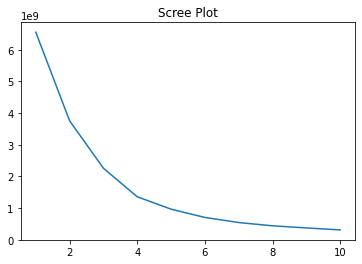

In [224]:
plt.plot(range(1,11),wb)
plt.title('Scree Plot')
plt.show()

- De acuerdo con el "scree plot" nos recomienda seleccionar entre 3 y 4 clusters, los cuales son considerados como solución óptima para el ejercicio de segmentación.

In [225]:
km = KMeans(n_clusters=3).fit(data5)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = data5.index.values
cluster_map['cluster'] = km.labels_
data4['cluster']=cluster_map['cluster']

In [226]:
data4.head()

,user,artist,plays,rating,gender,age,country,gender2,country2,cluster
0,edfc2c631515a56bcbb039e6e97491c9053055c8,sabaton,35149,100,m,18.0,Sweden,0,205,2
1,a8031d5e7f7bccee6dc80367029fe91fc980daca,assemblage 23,24077,100,f,21.0,Canada,1,38,2
2,9a985d5f2b606b058d96ab9a5223eeb376f237d5,britney spears,16593,100,m,17.0,Brazil,0,30,2
3,2fc194c486db27ad6c528662d2caefa312b5016b,stam1na,15773,100,f,18.0,Finland,1,72,2
4,fcf9b47e6ef6aa3d7d5697edc3f9aff266868a94,billy joel,15089,100,m,23.0,United States,0,226,2


#### Participación de cada segmento obtenido en la clasificación realizada mediante el método de vecinos más cercanos (KMeans)

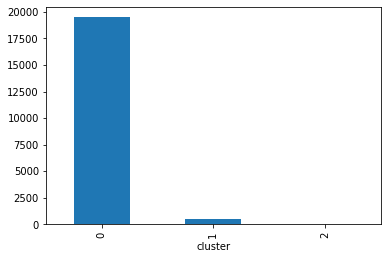

In [250]:
data4.groupby(['cluster']).count()['age'].plot(kind = 'bar')

- Teniendo en cuenta la participación de cada segmento, se evidencia que el primer segmento es el de mayor participación, el cual contiene casi toda la muestra, mientra que los segmentos 2 y 3 tienen muy baja participación. Esto indica que las variables demográficas que tenemos disponibles no son suficientes para generar una adecuada segmentación de los usuarios.

- Aún así, utilizaremos la segmentación encontrada para tomar los principales artistas y usuarios de cada segmento (a lo sumo los primeros 1500 de cada grupo), para construir a partir de ellos un sistema de recomendación que quizás pueda mejorar el desempeño de los modelos antes implementados.

In [228]:
data4 =data4.sort_values(["cluster","plays"], axis = 0, ascending = False, 
                  na_position ='last')

In [229]:
data5=data4.sort_values(['cluster','plays'], ascending=False).groupby('cluster').head(1500)

In [230]:
data5["rating"]= pd.qcut(data5['plays'], 100, labels=False).astype(int) + 1
data5.head()

,user,artist,plays,rating,gender,age,country,gender2,country2,cluster
0,edfc2c631515a56bcbb039e6e97491c9053055c8,sabaton,35149,100,m,18.0,Sweden,0,205,2
1,a8031d5e7f7bccee6dc80367029fe91fc980daca,assemblage 23,24077,100,f,21.0,Canada,1,38,2
2,9a985d5f2b606b058d96ab9a5223eeb376f237d5,britney spears,16593,100,m,17.0,Brazil,0,30,2
3,2fc194c486db27ad6c528662d2caefa312b5016b,stam1na,15773,100,f,18.0,Finland,1,72,2
4,fcf9b47e6ef6aa3d7d5697edc3f9aff266868a94,billy joel,15089,100,m,23.0,United States,0,226,2


In [231]:
data5.shape

(2023, 10)

In [232]:
data5 =data5.sort_values(["plays"], axis = 0, ascending = False, 
                  na_position ='last')
data5.head()

,user,artist,plays,rating,gender,age,country,gender2,country2,cluster
0,edfc2c631515a56bcbb039e6e97491c9053055c8,sabaton,35149,100,m,18.0,Sweden,0,205,2
1,a8031d5e7f7bccee6dc80367029fe91fc980daca,assemblage 23,24077,100,f,21.0,Canada,1,38,2
2,9a985d5f2b606b058d96ab9a5223eeb376f237d5,britney spears,16593,100,m,17.0,Brazil,0,30,2
3,2fc194c486db27ad6c528662d2caefa312b5016b,stam1na,15773,100,f,18.0,Finland,1,72,2
4,fcf9b47e6ef6aa3d7d5697edc3f9aff266868a94,billy joel,15089,100,m,23.0,United States,0,226,2


In [233]:
data6=data5.iloc[:,[0,1,3]]
data6.notnull().sum()
data6.head()

,user,artist,rating
0,edfc2c631515a56bcbb039e6e97491c9053055c8,sabaton,100
1,a8031d5e7f7bccee6dc80367029fe91fc980daca,assemblage 23,100
2,9a985d5f2b606b058d96ab9a5223eeb376f237d5,britney spears,100
3,2fc194c486db27ad6c528662d2caefa312b5016b,stam1na,100
4,fcf9b47e6ef6aa3d7d5697edc3f9aff266868a94,billy joel,100


#### Con base en esta muestra, se aplican las metodologías de sistemas de recomendación incluidas en la librería Surprise.

In [234]:
import surprise

from surprise import Reader
from surprise import SVD, SVDpp, SlopeOne, NMF, NormalPredictor, KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.model_selection import LeaveOneOut

In [235]:
reader = Reader(rating_scale=(1, 100))
data = Dataset.load_from_df(data6[['user', 'artist', 'rating']], reader)
data

In [236]:
benchmark = []
# Implementamos validacion cruzada sobre todos los algoritmos
for algoritmo in [SVD(), SVDpp(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    
    print("\nAlgoritmo: ", algoritmo)
    tiempo = datetime.datetime.now()
    print('\nInicia la validacion cruzada: ', tiempo)
    
    results = cross_validate(algoritmo, data, measures=['RMSE','fcp'], cv=3, verbose=False)
    
    tiempo = datetime.datetime.now()
    print('\nTermina: ', tiempo)
    
    # Guardamos los resultados
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algoritmo).split(' ')[0].split('.')[-1]], index=['Algoritmo']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algoritmo').sort_values('test_rmse')  


Algoritmo:  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7fd280791860>

Inicia la validacion cruzada:  2020-12-14 01:32:28.882267

Termina:  2020-12-14 01:32:29.195347

Algoritmo:  <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7fd280791978>

Inicia la validacion cruzada:  2020-12-14 01:32:29.198372

Termina:  2020-12-14 01:32:29.689336

Algoritmo:  <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7fd2807918d0>

Inicia la validacion cruzada:  2020-12-14 01:32:29.692277

Termina:  2020-12-14 01:32:30.423696

Algoritmo:  <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7fd280791908>

Inicia la validacion cruzada:  2020-12-14 01:32:30.426205

Termina:  2020-12-14 01:32:30.466897

Algoritmo:  <surprise.prediction_algorithms.knns.KNNBaseline object at 0x7fd280791e10>

Inicia la validacion cruzada:  2020-12-14 01:32:30.469373
Estimating biases using als...
Computing the msd similarity matrix...
Done c

,test_rmse,test_fcp,fit_time,test_time
Algoritmo,,,,
KNNBasic,28.935556,0.000000,0.051731,0.005250
SVDpp,28.965931,0.166667,0.152747,0.005000
SVD,29.020254,0.333333,0.093117,0.004771
KNNBaseline,29.036906,0.333333,0.059397,0.004765
CoClustering,29.045764,0.000000,0.220513,0.003893
KNNWithMeans,29.056079,0.000000,0.068431,0.005348
KNNWithZScore,29.065718,0.000000,0.105980,0.005401
BaselineOnly,29.134781,0.333333,0.006044,0.005453
NMF,29.265441,0.000000,0.233014,0.004864


- Con base en las métricas de desempeño (RSME y FCP), los modelos implementados a partir de la nueva muestra obtenida con base en la segmentación de las variables demográdicas, no se vieron impactados positivamente. 

- Este resultado era probable, teniendo en cuenta que la segmentación presentó un grupo de alta participación y dos grupos de muy baja. 

In [237]:
bsl_options = {'method': 'als',
               'n_epochs': 20,
               'reg_u': 12, 
               'reg_i': 5  
               }

sim_options = {'name': 'cosine',
               'user_based': False  # calcula similitudes entre items
               }

In [238]:
trainset, testset = train_test_split(data, test_size=0.3)

SVD = SVDpp(random_state=0)
KNN = KNNBaseline(bsl_options=bsl_options, sim_options=sim_options)
Base = BaselineOnly(bsl_options=bsl_options)

print("\nSVDpp: ")
tiempo = datetime.datetime.now()
print('\nInicia el entrenamiento y prueba: ', tiempo)

predSVD = SVD.fit(trainset).test(testset)
print("RMSE del SVDpp: ", accuracy.rmse(predSVD))

tiempo = datetime.datetime.now()
print('\nTermina: ', tiempo)

print("\nKNNBaseline: ")
tiempo = datetime.datetime.now()
print('\nInicia el entrenamiento y prueba: ', tiempo)

predKNN = KNN.fit(trainset).test(testset)
print("\nRMSE del KNNBaseline: ", accuracy.rmse(predKNN))

tiempo = datetime.datetime.now()
print('\nTermina: ', tiempo)

print("\nBaselineOnly: ")
tiempo = datetime.datetime.now()
print('\nInicia el entrenamiento y prueba: ', tiempo)

predBase = Base.fit(trainset).test(testset)
print("\nRMSE del BaselineOnly: ", accuracy.rmse(predBase))
tiempo = datetime.datetime.now()
print('\nTermina: ', tiempo)



SVDpp: 

Inicia el entrenamiento y prueba:  2020-12-14 01:32:49.530060
RMSE: 28.4174
RMSE del SVDpp:  28.41735648108178

Termina:  2020-12-14 01:32:49.698970

KNNBaseline: 

Inicia el entrenamiento y prueba:  2020-12-14 01:32:49.699382
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 28.6560

RMSE del KNNBaseline:  28.655965791136246

Termina:  2020-12-14 01:32:49.756183

BaselineOnly: 

Inicia el entrenamiento y prueba:  2020-12-14 01:32:49.756371
Estimating biases using als...
RMSE: 28.6560

RMSE del BaselineOnly:  28.655965791136246

Termina:  2020-12-14 01:32:49.776980


- Los resultados utilizado muestra de prueba y entrenamiento también evidencian que el desempeño no es mejor utilizando la nueva base obtenida a partir de la segmentación.